In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification

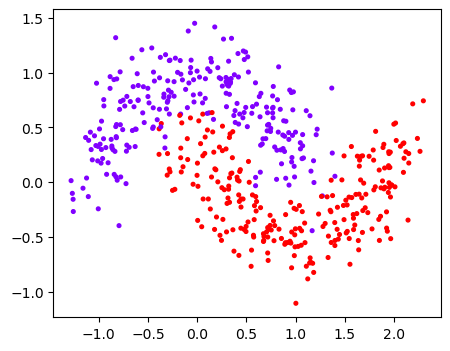

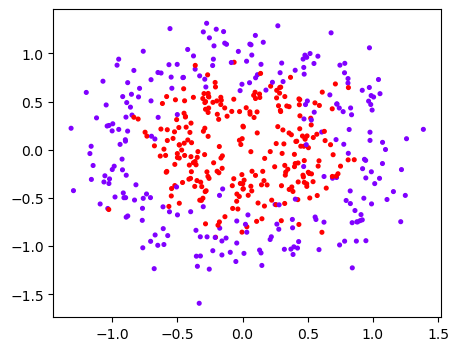

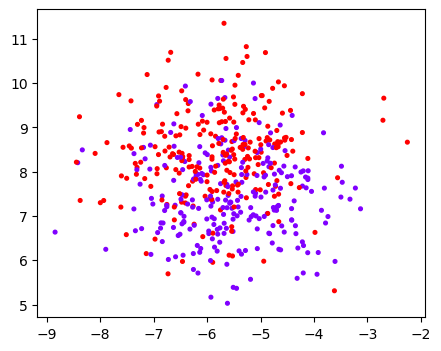

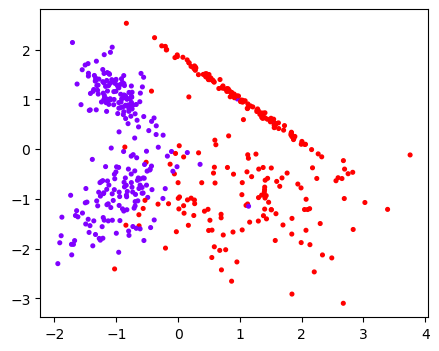

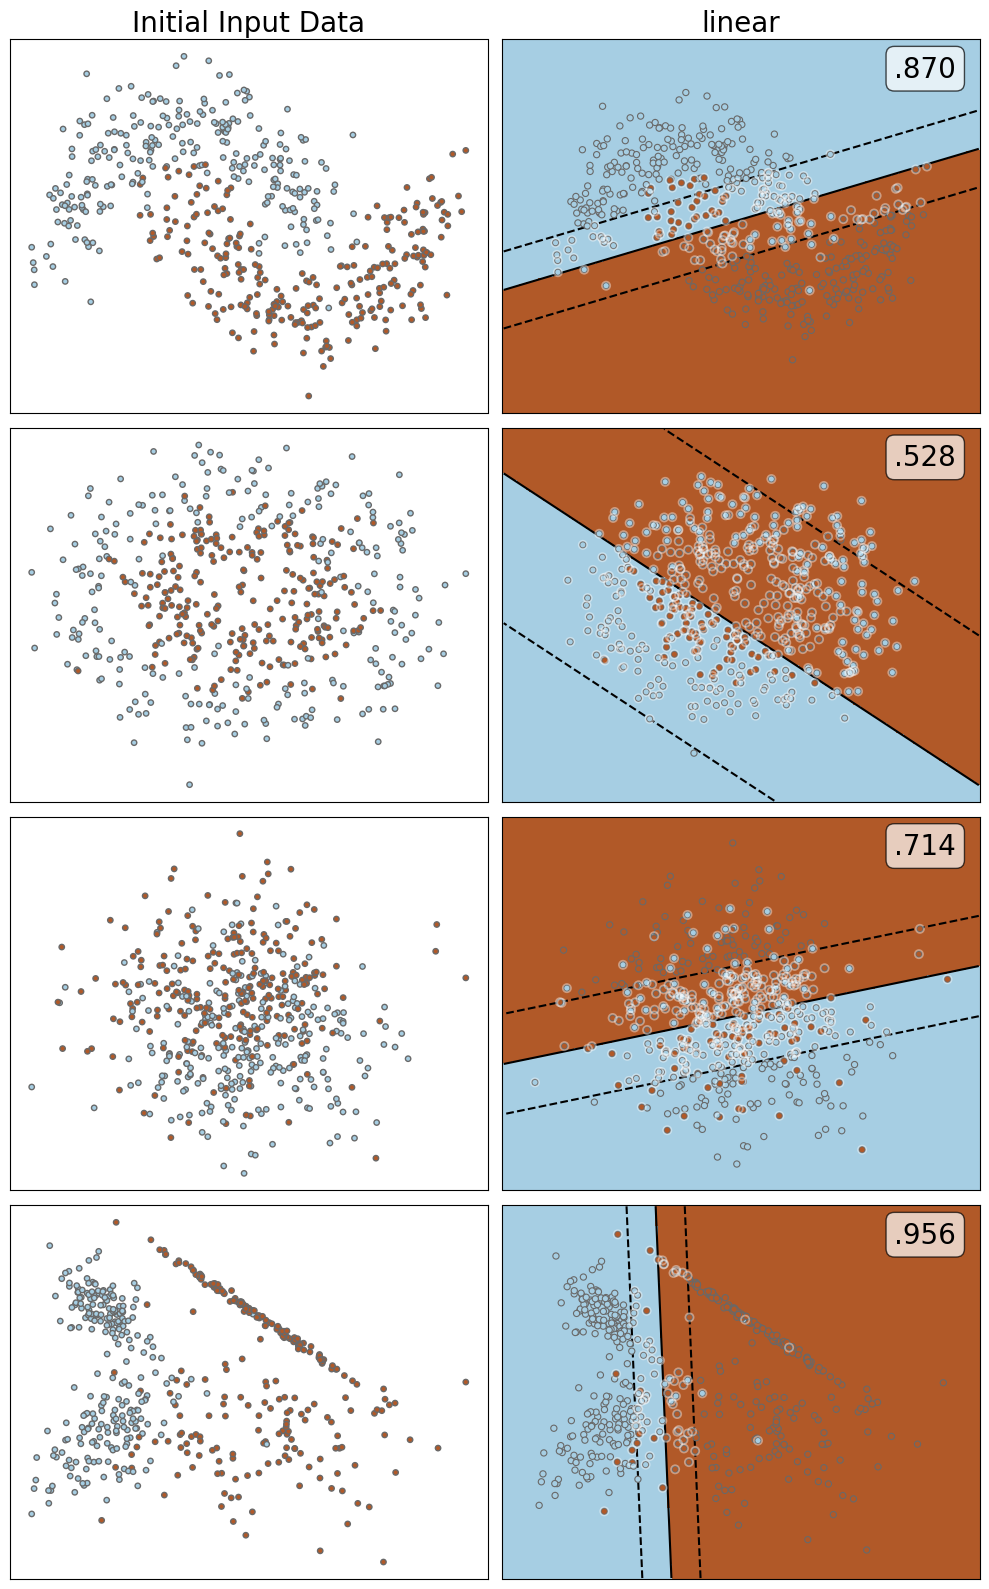

In [2]:
n_samples = 500
datasets = [make_moons (n_samples = n_samples,noise = 0.2, random_state = 0),
            make_circles (n_samples = n_samples,noise = 0.2, factor = 0.5, random_state = 1),
            make_blobs (n_samples = n_samples,centers = 2, random_state = 5),
            make_classification (n_samples = n_samples,n_features = 2, n_informative =2, n_redundant = 0)
           ]
Kernel = ["linear"]

for x,y in datasets:
    plt.figure(figsize = (5,4))
    plt.scatter(x[:,0],x[:,1],c = y, s = 7, cmap = "rainbow")
    
nrows = len(datasets)
ncols = len(Kernel) + 1
fig,axes = plt.subplots(nrows,ncols,figsize = (10,16))

for index_datasets, (x,y) in enumerate(datasets):
    sub_plot = axes[index_datasets, 0]
    if index_datasets == 0:
        sub_plot.set_title("Initial Input Data",
                           fontdict={'fontsize': 20}
                          )
    sub_plot.scatter(x[:,0],x[:,1],c = y,
               s = 15,
               zorder = 10,
               cmap = plt.cm.Paired,
               edgecolors = "dimgrey"
              )
    sub_plot.set_xticks(())
    sub_plot.set_yticks(())
    
    for index_kernel, kernel in enumerate(Kernel):
        sub_plot = axes[index_datasets,index_kernel + 1]
        model = SVC (kernel = kernel, gamma = 2).fit(x,y)
        score = model.score(x,y)
        sub_plot.scatter(x[:,0],x[:,1], c = y,
                         s = 20,
                         zorder = 10,
                         cmap = plt.cm.Paired,
                         edgecolors = "dimgrey",
                         linewidths = 0.8
                        )
        sub_plot.scatter(model.support_vectors_[:,0],
                         model.support_vectors_[:,1],
                         s = 35,
                         facecolors = "none",
                         zorder = 10,
                         edgecolors = "white",
                         alpha = 0.4,
                         linewidths = 1.25
                        )
        x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
        y_min,y_max = x[:,1].min() - .5,x[:,1].max() + .5
        x_grid,y_grid = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        height = model.decision_function(np.c_[x_grid.ravel(),y_grid.ravel()]).reshape(x_grid.shape)
        sub_plot.pcolormesh(x_grid,y_grid,height > 0, cmap = plt.cm.Paired)
        sub_plot.contour(x_grid,y_grid,height,
                            colors = ['k','k','k'],
                            linestyles = ['--','-','--'],
                            levels = [-1,0,1]
                            )
        sub_plot.set_xticks(())
        sub_plot.set_yticks(())
        if index_datasets == 0:
            sub_plot.set_title(kernel,
                               fontdict={'fontsize': 20}
                              )
        sub_plot.text(0.95,0.90,('%.3f' % score).lstrip('0'),
                      size = 20,
                      bbox = dict(boxstyle = 'round',alpha = 0.7, facecolor = 'white'),
                      transform = sub_plot.transAxes,
                      horizontalalignment = 'right'
                     )

plt.tight_layout()
plt.show()
    

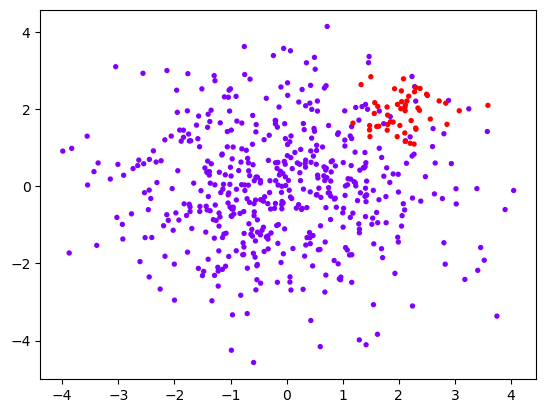

In [3]:
####样本不均衡问题
##class_weight
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
x,y = make_blobs (n_samples = [class_1,class_2],
                  centers = centers,
                  cluster_std = clusters_std,
                  random_state = 0,
                  shuffle = False
                 )
plt.scatter(x[:,0],x[:,1],c = y,
            cmap = "rainbow",
            s = 8
           )
plt.show()

In [4]:
class_weight = {0: 1, 1: class_1 / class_2}
model_regular = SVC (kernel = "linear", C = 1.0)
model_regular.fit(x,y)
model_weighted = SVC (kernel = "linear", class_weight = class_weight)
model_weighted.fit(x,y)
print("Regular model score:", model_regular.score(x,y))
print("Weighted model score:", model_weighted.score(x,y))
#做样本均衡后准确率变低

Regular model score: 0.9418181818181818
Weighted model score: 0.9127272727272727


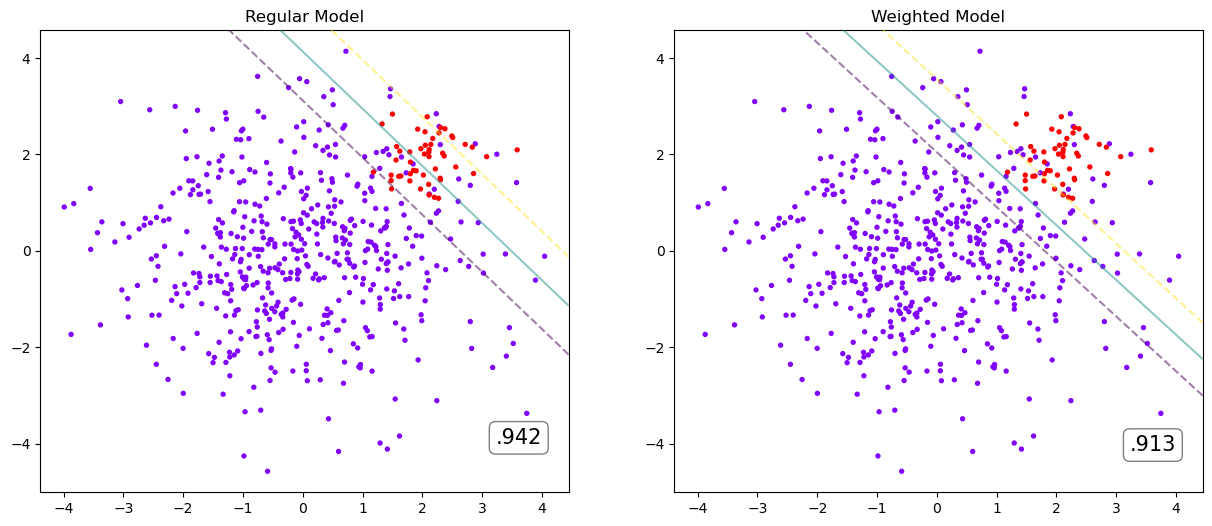

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].scatter(x[:,0], x[:,1], c=y, cmap="rainbow", s=8)
axes[1].scatter(x[:,0], x[:,1], c=y, cmap="rainbow", s=8)
xlim_1 = axes[0].get_xlim()
ylim_1 = axes[0].get_ylim()
x_points_1 = np.linspace(xlim_1[0],xlim_1[1],100)
y_points_1 = np.linspace(ylim_1[0],ylim_1[1],100)
y_grid_1,x_grid_1 = np.meshgrid(y_points_1,x_points_1)
xy_grid_1 = np.vstack([x_grid_1.ravel(),y_grid_1.ravel()]).T
xlim_2 = axes[1].get_xlim()
ylim_2 = axes[1].get_ylim()
x_points_2 = np.linspace(xlim_2[0],xlim_2[1],100)
y_points_2 = np.linspace(ylim_2[0],ylim_2[1],100)
y_grid_2,x_grid_2 = np.meshgrid(y_points_2,x_points_2)
xy_grid_2 = np.vstack([x_grid_2.ravel(),y_grid_2.ravel()]).T

axes[0].set_title('Regular Model')
decision_surf_regular = SVC(kernel="linear", C=1.0).fit(x, y)
height_regular = decision_surf_regular.decision_function(xy_grid_1).reshape(x_grid_1.shape)
axes[0].contour(x_grid_1, y_grid_1, height_regular, 
                levels=[-1, 0, 1], 
                alpha=0.5, 
                linestyles=["--", "-", "--"],
                zorder = 100
               )
score_1 = decision_surf_regular.score(x, y)
axes[0].text(4, -4, ('%.3f' % score_1).lstrip('0'),
             size=15,
             bbox=dict(boxstyle='round', alpha=0.5, facecolor='white'),
             horizontalalignment='right'
            )

axes[1].set_title('Weighted Model')
decision_surf_weighted = SVC(kernel="linear", class_weight=class_weight).fit(x, y)
height_weighted = decision_surf_weighted.decision_function(xy_grid_2).reshape(x_grid_2.shape)
axes[1].contour(x_grid_2, y_grid_2, height_weighted, 
                levels=[-1, 0, 1], 
                alpha=0.5, 
                linestyles=["--", "-", "--"],
                zorder = 100
               )
score_2 = decision_surf_weighted.score(x,y)
axes[1].text(4, -4.15,('%.3f' % score_2).lstrip('0'),
                      size = 15,
                      bbox = dict(boxstyle = 'round',alpha = 0.5, facecolor = 'white'),
                      horizontalalignment = 'right'
                     )

plt.show()

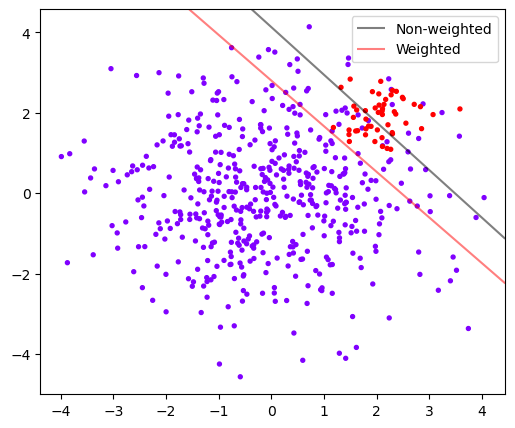

In [6]:
plt.figure(figsize = (6,5))
plt.scatter(x[:,0], x[:,1], c=y, cmap="rainbow", s=8)
sub_plot = plt.gca()
xlim = sub_plot.get_xlim()
ylim = sub_plot.get_ylim()
x_points = np.linspace(xlim[0],xlim[1],100)
y_points = np.linspace(ylim[0],ylim[1],100)
y_grid,x_grid = np.meshgrid(y_points,x_points)
xy_grid = np.vstack([x_grid.ravel(),y_grid.ravel()]).T
height_r = model_regular.decision_function(xy_grid).reshape(x_grid.shape)
height_w = model_weighted.decision_function(xy_grid).reshape(x_grid.shape)
deci_surf_r = sub_plot.contour(x_grid, y_grid, height_r, 
                levels = [0], 
                alpha = 0.5, 
                linestyles=["-"],
                colors = "black"
               )
deci_surf_w = sub_plot.contour(x_grid, y_grid, height_w, 
                levels = [0], 
                alpha = 0.5, 
                linestyles=["-"],
                colors = "red"
               )

plt.legend([[*deci_surf_r.legend_elements()][0][0], [*deci_surf_w.legend_elements()][0][0]],
           ['Non-weighted', 'Weighted'],
           loc = 0
          )
plt.show()

In [7]:
####Confusion Matrix 混淆矩阵
##accuracy(准确率) = 所有预测正确的样本/总样本数
##precision(精确率) = 真正少数类比例/所有被预测为少数类的样本
#结合图precision:黑线上方所有点中有多少红点
model_regular.predict(x) #所有被预测为少数类的样本
(model_regular.predict(x) == 1).sum() #所有被预测为少数类的样本的个数
y == model_regular.predict(x) #被预测正确的少数类
y[y == model_regular.predict(x)] #切片
(y[y == model_regular.predict(x)] == 1).sum() #预测为少数类中真正少数类的个数
prcision_regular = (y[y == model_regular.predict(x)] == 1).sum()/(model_regular.predict(x) == 1).sum()
prcision_regular

0.7142857142857143

In [8]:
prcision_weighted = (y[y == model_weighted.predict(x)] == 1).sum()/(model_weighted.predict(x) == 1).sum()
prcision_weighted 

0.5102040816326531

In [9]:
##recall(召回率) = 被预测正确的比例/所有真实为少数类的样本
#所有红色的点中有多少在决策平面上方
#只关心少数类的参数
#分子与precision的分子一样
(y[y == model_regular.predict(x)] == 1).sum() #预测为少数类中真正少数类的个数
(y == 1).sum() #所有少数类个数
recall_regular = (y[y == model_regular.predict(x)] == 1).sum()/(y == 1).sum()
recall_regular

0.6

In [10]:
recall_weighted = (y[y == model_weighted.predict(x)] == 1).sum()/(y == 1).sum()
recall_weighted

1.0

In [11]:
##F1-measure:同时兼顾precision和recall,越接近1越好
F1_regular = (2 * prcision_regular * recall_regular) / (prcision_regular + recall_regular)
F1_weighted = (2 * prcision_weighted * recall_weighted) / (prcision_weighted + recall_weighted)
print(F1_regular);print(F1_weighted)

0.6521739130434783
0.6756756756756758


In [12]:
##Specificity(特异度) = 被正确预测的样本的比例/所有真实为多数类的样本
#所有紫色点有多少在决策平面下方(被预测正确)
#衡量一个模型将多数类判断正确的能力
specificity_regular = (y[y == model_regular.predict(x)] == 0).sum() / (y == 0).sum()
specificity_regular

0.976

In [13]:
specificity_weighted = (y[y == model_weighted.predict(x)] == 0).sum() / (y == 0).sum()
specificity_weighted

0.904

In [14]:
##False Positive Rate (FPR)(假正率) =  1 - specificity(特异度)

In [15]:
#### ROC曲线 ####
## 衡量每判断正确一个少数类,有多少多数类被牺牲/误伤
#如果recall比FPR增加的快,则代价较小

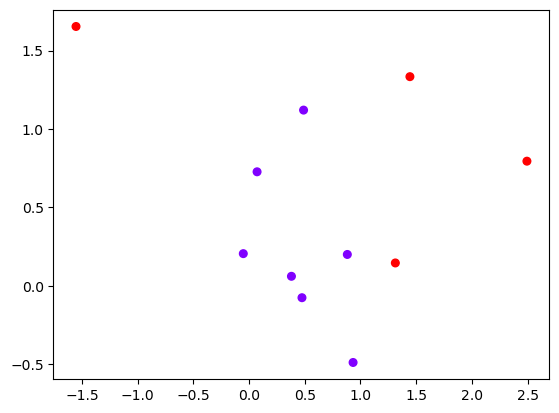

In [16]:
class_1_ = 7
class_2_ = 4
centers = [[0.0,0.0],[1,1]]
clusters_std_ = [0.5,1]
x_,y_ = make_blobs (n_samples = [class_1_,class_2_],
                    centers = centers,
                    cluster_std = clusters_std_,
                    random_state = 0,
                    shuffle = False
                   )
plt.scatter(x_[:,0],x_[:,1],c = y_,
            cmap = "rainbow",
            s = 30
           )
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression as LogiR
import pandas as pd
clf_lo = LogiR().fit(x_,y_)
prob = clf_lo.predict_proba(x_)
prob = pd.DataFrame(prob)
prob.columns = ["class_0","class_1"]
prob #表示每个样本在类别0和类别1上的概率

,class_0,class_1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [18]:
for i in range (prob.shape[0]):
    if prob.loc[i,"class_1"] > 0.5:
        prob.loc[i,"predicted_class"] = 1
    else:
        prob.loc[i,"predicted_class"] = 0

prob

,class_0,class_1,predicted_class
0,0.694619,0.305381,0.0
1,0.510931,0.489069,0.0
2,0.820038,0.179962,0.0
3,0.785647,0.214353,0.0
4,0.777387,0.222613,0.0
5,0.656634,0.343366,0.0
6,0.768586,0.231414,0.0
7,0.349171,0.650829,1.0
8,0.366184,0.633816,1.0
9,0.663272,0.336728,0.0


In [19]:
prob["y_true"] = y_
prob = prob.sort_values(by = "class_1",ascending = False)
prob

,class_0,class_1,predicted_class,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [20]:
####sklearn中的混淆矩阵
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R
cm = CM(prob.loc[:,"y_true"],prob.loc[:,"predicted_class"],labels = [1,0])
p = P(prob.loc[:,"y_true"],prob.loc[:,"predicted_class"],labels = [1,0])
r = R(prob.loc[:,"y_true"],prob.loc[:,"predicted_class"],labels = [1,0])
print("Confusion Matrix:")
print(cm)
print("Precision Score:")
print(p)
print("Recall Score:")
print(r)

Confusion Matrix:
[[2 2]
 [0 7]]
Precision Score:
1.0
Recall Score:
0.5


In [21]:
##如果改变阈值
clf_lo = LogiR().fit(x_,y_)
prob = clf_lo.predict_proba(x_)
prob = pd.DataFrame(prob)
prob.columns = ["class_0","class_1"]
for i in range (prob.shape[0]):
    if prob.loc[i,"class_1"] > 0.35:
        prob.loc[i,"predicted_class"] = 1
    else:
        prob.loc[i,"predicted_class"] = 0

prob["y_true"] = y_
prob = prob.sort_values(by = "class_1",ascending = False)
cm = CM(prob.loc[:,"y_true"],prob.loc[:,"predicted_class"],labels = [1,0])
p = P(prob.loc[:,"y_true"],prob.loc[:,"predicted_class"],labels = [1,0])
r = R(prob.loc[:,"y_true"],prob.loc[:,"predicted_class"],labels = [1,0])
print("Confusion Matrix:");print(cm);print("Precision Score:");print(p);print("Recall Score:");print(r)

Confusion Matrix:
[[3 1]
 [1 6]]
Precision Score:
0.75
Recall Score:
0.75


In [22]:
#### SVM中的概率预测 ####
model_prob = SVC (kernel = "linear", C = 1.0, probability = True).fit(x,y)
model_prob.predict_proba(x).shape #对应各类标签下的概率

(550, 2)

In [23]:
model_prob.decision_function(x).shape #到决策边界的距离

(550,)

In [24]:
#### ROC曲线绘制 ####
cm[1,0]/cm[1,:].sum() #FPR

0.14285714285714285

In [25]:
cm[0,0]/cm[0,:].sum() #recall

0.75

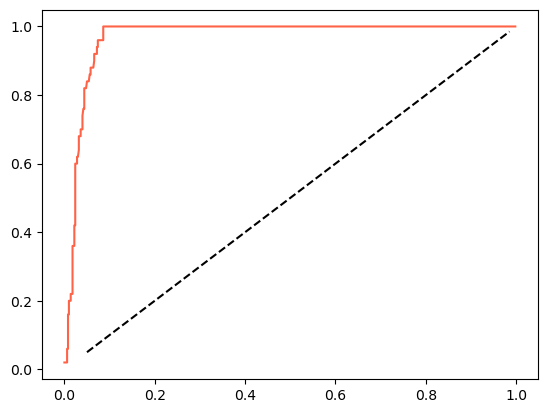

In [26]:
recall = []
FPR = []
# 概率 model_prob.predict_proba(x)[:,1] 所有样本在类别1下的概率
#      model_prob.predict_proba(x)[:,0] 所有样本在类别0下的概率
# 阈值 每一个阈值都对应着一次循环,都有混淆矩阵,都有FPR vs recall
# np.linspace(概率最小值,概率最大值,个数,不要取最大值)
prob_range = np.linspace(model_prob.predict_proba(x)[:,1].min(),
                         model_prob.predict_proba(x)[:,1].max(),
                         num = 300,
                         endpoint = False
                        )
for i in prob_range:#在不同阈值下循环
    y_predict = []
    for j in range(x.shape[0]):
        if model_prob.predict_proba(x)[j,1] > i:#在每个阈值下,对各个特征循环(这一行的概率是否大于i)
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels = [1,0])#生成混淆矩阵,并计算recall和FPR
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
    
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c = "tomato")
plt.plot(prob_range+0.05,prob_range+0.05,c = "black",linestyle = "--")
plt.show()
#ROC曲线希望:在提升recall的同时,FPR提升的越缓慢越好 (在尽量捕捉少数类时,误伤多数类较少)
#如果图像在左上方(角),模型越好(凸性)
#凹形ROC曲线表示模型把多数类和少数类弄反了
#ROC接近中间虚线:模型不好

In [27]:
## 使用sklearn计算AUC面积, 并且画ROC曲线
from sklearn.metrics import roc_curve
FPR,recall,thresholds = roc_curve(y,model_prob.decision_function(x),pos_label = 1) #(标签,置信度,label)

In [28]:
FPR.shape

(45,)

In [29]:
recall.shape

(45,)

In [30]:
thresholds.shape

(45,)

In [34]:
from sklearn.metrics import roc_auc_score as AUC
area_AUC = AUC(y,model_prob.decision_function(x))

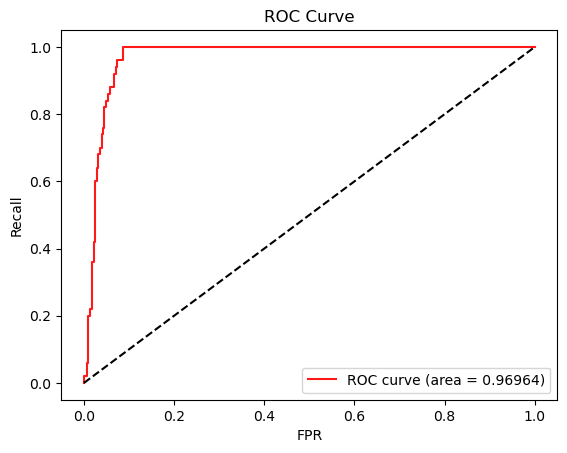

In [43]:
plt.figure ()
plt.plot(FPR,recall,color = "red",
         label = "ROC curve (area = %0.5f)" % area_AUC,
         alpha = 0.9
        )
plt.plot([0,1],[0,1],color = "black", linestyle = "--")
plt.xlim ([-0.05, 1.05])
plt.ylim ([-0.05, 1.05])
plt.xlabel ("FPR")
plt.ylabel ("Recall")
plt.title ("ROC Curve")
plt.legend (loc = 0)
plt.show()

In [47]:
###找到最优点:recall 和 FPR差距最大的点
maxindex = (recall-FPR).tolist().index(max(recall - FPR))
print(maxindex);print(max(recall - FPR))

43
0.914


In [50]:
#decision_function 生成的最佳置信度的最佳阈值
thresholds[maxindex]

-1.0860191749391461

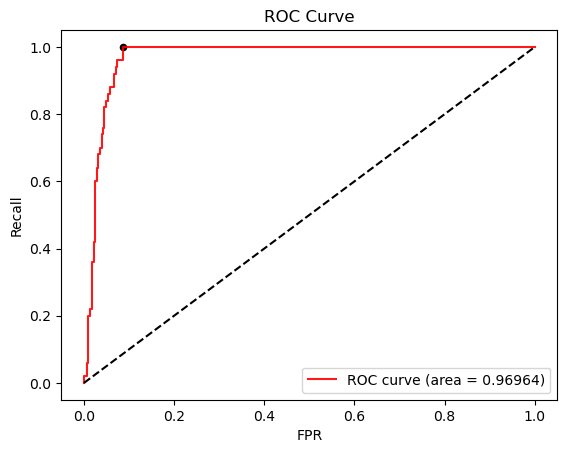

In [53]:
#在图上显示最佳阈值的点
plt.figure ()
plt.plot(FPR,recall,color = "red",
         label = "ROC curve (area = %0.5f)" % area_AUC,
         alpha = 0.9
        )
plt.plot([0,1],[0,1],color = "black", linestyle = "--")
plt.scatter(FPR[maxindex],recall[maxindex],c = 'black',s=20)
plt.xlim ([-0.05, 1.05])
plt.ylim ([-0.05, 1.05])
plt.xlabel ("FPR")
plt.ylabel ("Recall")
plt.title ("ROC Curve")
plt.legend (loc = 0)
plt.show()